Daniil Abbruzzese
Github username: Daniilab
USC ID: 4721123667

In [60]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import itertools
import numpy as np


# 1(a) and 1(b)i

In [61]:

excel_file = "../data/CCPP/Folds5x2_pp.xlsx"

# Load each sheet into a separate DataFrame
sheet_names = ['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4', 'Sheet5']  # Replace with your actual sheet names
dfs_dict = {}  # Create a dictionary to store DataFrames

for sheet_name in sheet_names:
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    dfs_dict[sheet_name] = df


df1 = dfs_dict['Sheet1']

row_count = df1.shape[0]
column_count = df1.shape[1]

print(f'number of rows = {row_count}, number of columns = {column_count}')

print('the first four columns represent an hourly average ambient variable: Average Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), and Relative Humidity (RH). The fifth column represents the responding variable of energy output (EP) of the plant. Each row represents a single data point, or an instance of these measured variables at a given time')



number of rows = 9568, number of columns = 5
the first four columns represent an hourly average ambient variable: Average Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), and Relative Humidity (RH). The fifth column represents the responding variable of energy output (EP) of the plant. Each row represents a single data point, or an instance of these measured variables at a given time


# 1(b)ii

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


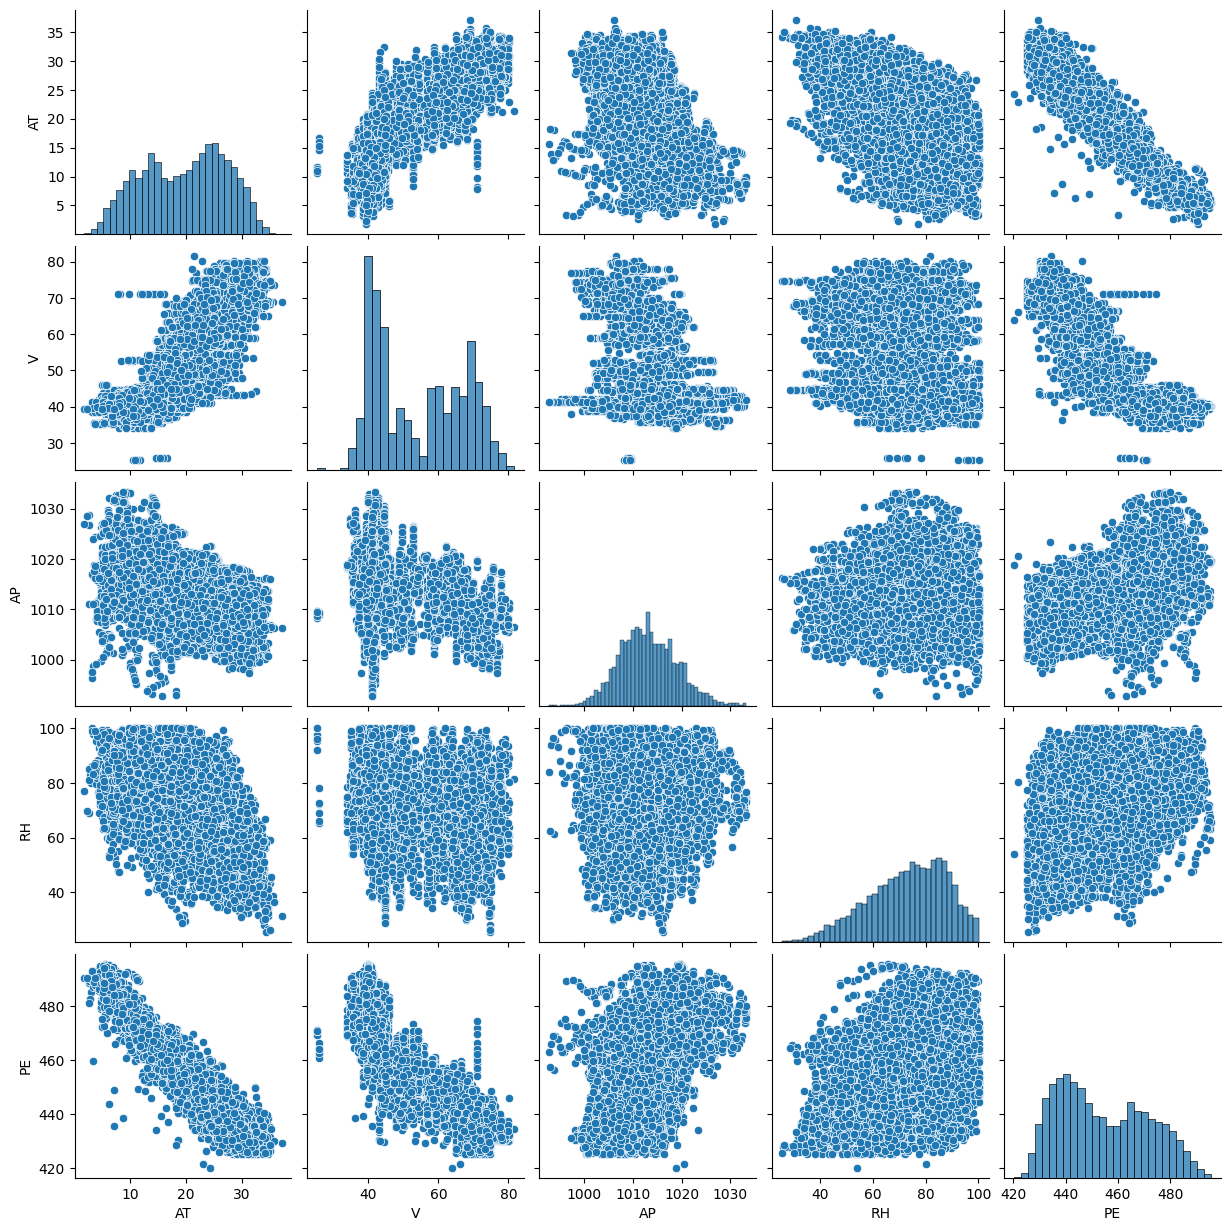

In [62]:
sns.pairplot(df1) 

#### Findings: Both Average temperature and Exhaust vacuum appear to be negatively correlated Energy output. Furtheremore, the independent variables Average Temperature and Exhaust vacuum appear to be positively correlated with one another, suggesting multiocollinearity in the data.

# 1(b)iii

In [63]:

summary_stats = df1.describe()

# Extract the specific statistics you want
mean = summary_stats.loc['mean']
median = df.median()
range_of_data = df.max() - df.min()
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1

# Create a summary table
summary_table = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Range': range_of_data,
    'Q1': Q1,
    'Q3': Q3,
    'IQR': IQR
})

print(summary_table)

           Mean    Median  Range         Q1       Q3      IQR
AT    19.651231    20.345  35.30    13.5100    25.72  12.2100
V     54.305804    52.080  56.20    41.7400    66.54  24.8000
AP  1013.259078  1012.940  40.41  1009.1000  1017.26   8.1600
RH    73.308978    74.975  74.60    63.3275    84.83  21.5025
PE   454.365009   451.550  75.50   439.7500   468.43  28.6800


# 1(c)

For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?

In [64]:


predictors = ['AT', 'V', 'AP', 'RH']
response = 'PE'


# Create a dictionary to store the regression models
simple_regression_results = {}

# Loop through each predictor and fit a linear regression model
for predictor in predictors:
    X = df1[[predictor]]
    y = df1[response]
    
    # Add a constant to the X matrix for the intercept
    X = sm.add_constant(X)
    
    # Fit the linear regression model using statsmodels
    model = sm.OLS(y, X).fit()
    
    # Store the model in the dictionary
    simple_regression_results[predictor] = model

    # Print the results, including the p-value
    print(f"Predictor: {predictor}")
    print(f"Coefficient: {model.params[1]}")
    print(f"Intercept: {model.params[0]}")
    print(f"P-value: {model.pvalues[1]:.5f}")
    print("\n")
print("Description: Each predictor is statistically significant, with p-values of less than 0.00001. AT has the biggest impact, while RH has the smallest impact on the responding variable. This is supported by the graphs below which show how the data points are much tighter around the regression line for AT when compared to RH.")

#print(regression_results['RH'].summary()) #use this to view OLR regression results table for a given predictor



Predictor: AT
Coefficient: -2.1713199585178034
Intercept: 497.0341198927665
P-value: 0.00000


Predictor: V
Coefficient: -1.1681351265557118
Intercept: 517.801526308386
P-value: 0.00000


Predictor: AP
Coefficient: 1.4898716733991118
Intercept: -1055.2609889844377
P-value: 0.00000


Predictor: RH
Coefficient: 0.4556501022629794
Intercept: 420.9617661554837
P-value: 0.00000


Description: Each predictor is statistically significant, with p-values of less than 0.00001. AT has the biggest impact, while RH has the smallest impact on the responding variable. This is supported by the graphs below which show how the data points are much tighter around the regression line for AT when compared to RH.


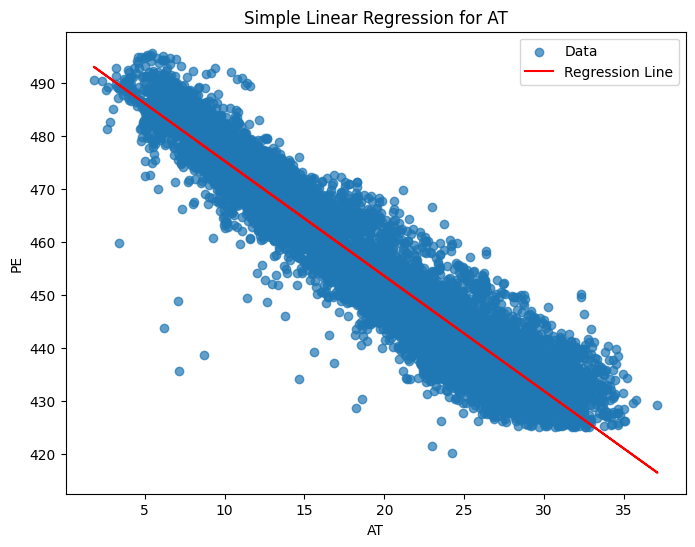

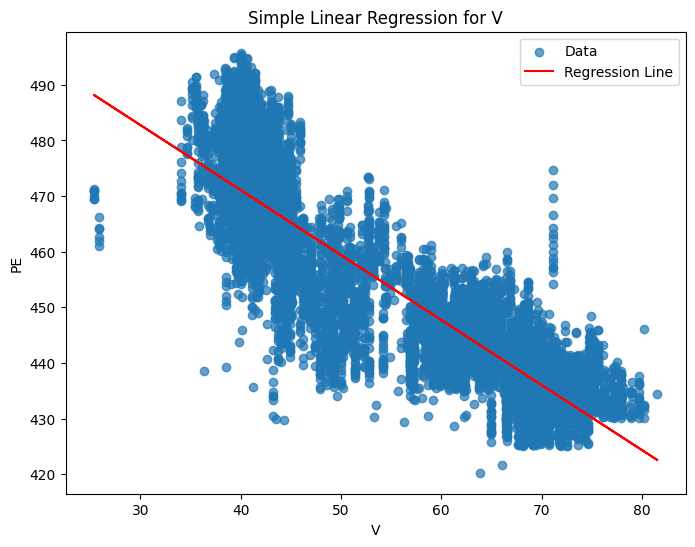

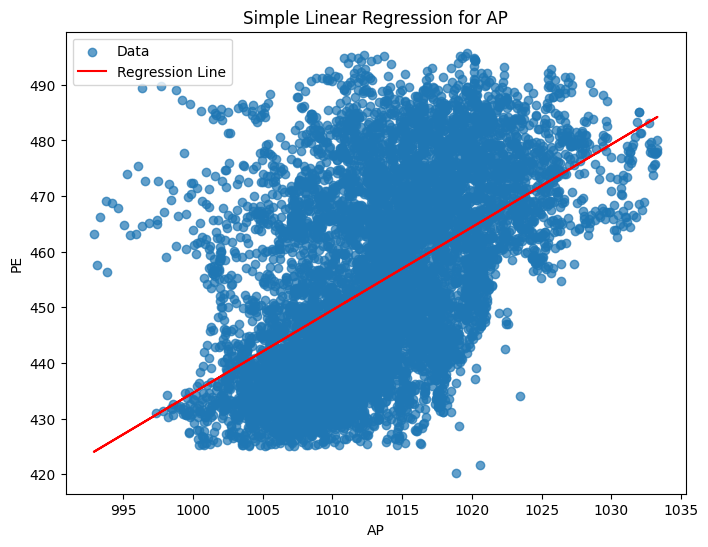

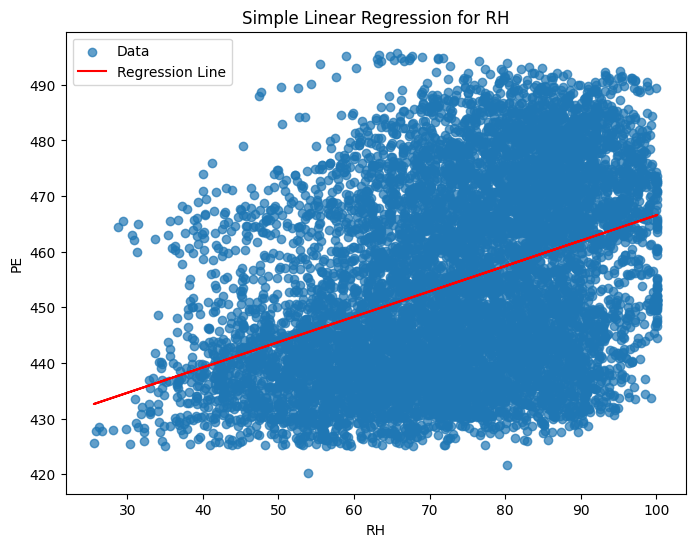

In [65]:
#Graphing the regression line 

# Loop through each predictor
for predictor in predictors:
    model = simple_regression_results[predictor]
    
    # Extract the data
    X = df[predictor]
    y = df[response]
    
    # Predictions from the model
    y_pred = model.predict(sm.add_constant(X))
    
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label='Data', alpha=0.7)
    
    # Plot the regression line
    plt.plot(X, y_pred, color='red', label='Regression Line')
    
    # Set labels and title
    plt.xlabel(predictor)
    plt.ylabel(response)
    plt.title(f'Simple Linear Regression for {predictor}')
    
    # Show legend
    plt.legend()
    
    # Show the plot
    plt.show()


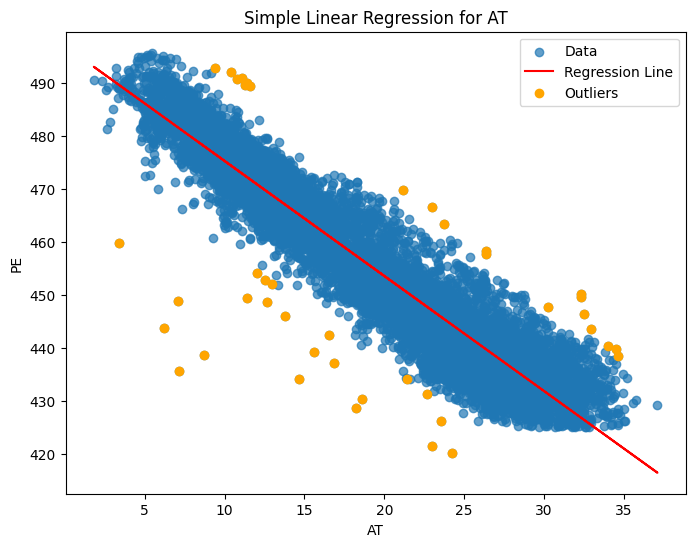

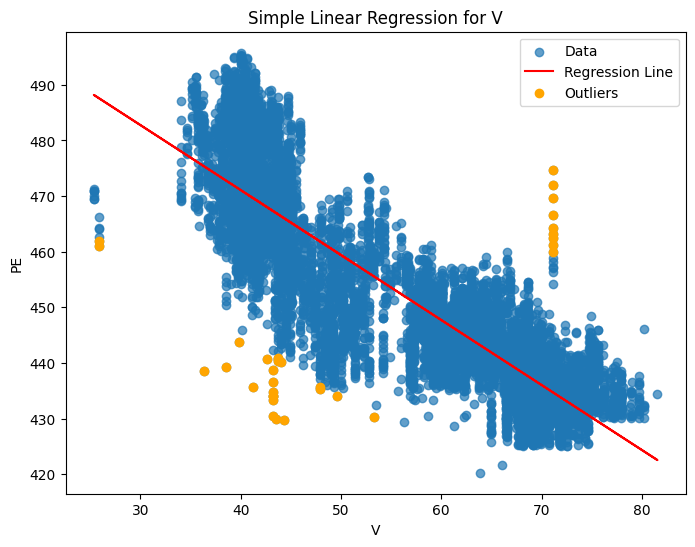

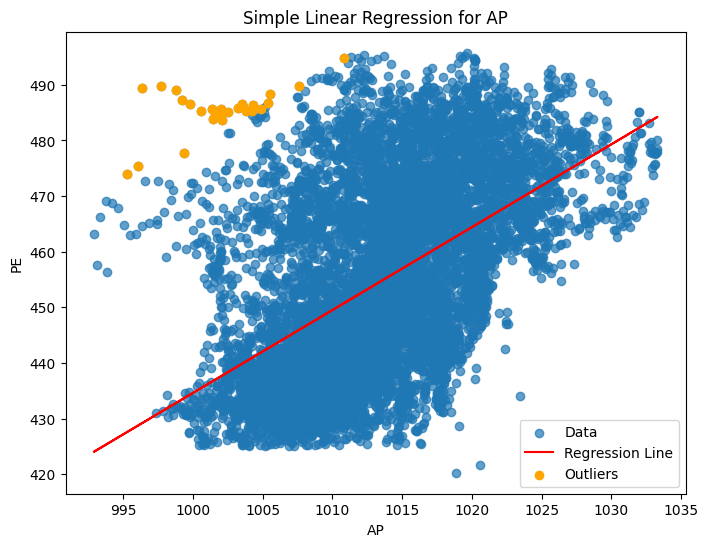

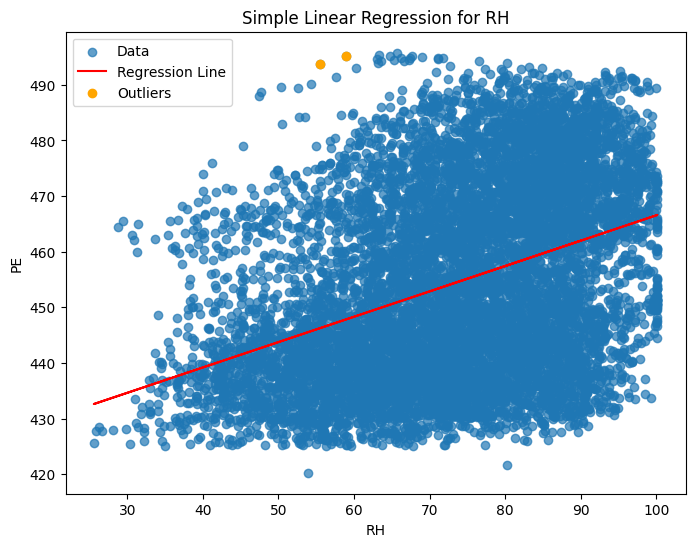

In [66]:
# Outlier detection

# Loop through each predictor
for predictor in predictors:
    model = simple_regression_results[predictor]
    
    # Extract the data
    X = df[predictor]
    y = df[response]
    
    # Predictions from the model
    y_pred = model.predict(sm.add_constant(X))
    
    # Calculate residuals (the difference between observed and predicted values)
    residuals = y - y_pred
    
    # Calculate the Z-scores for the residuals
    z_scores = (residuals - np.mean(residuals)) / np.std(residuals)
    
    # Defining a threshold for outlier detection (e.g., Z-score > 3 or < -3)
    outlier_threshold = 3
    
    # Find the indices of outliers
    outlier_indices = np.where(np.abs(z_scores) > outlier_threshold)[0]
    
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label='Data', alpha=0.7)
    
    # Plot the regression line
    plt.plot(X, y_pred, color='red', label='Regression Line')
    
    # Plot outliers in a different color
    plt.scatter(X[outlier_indices], y[outlier_indices], color='orange', label='Outliers')
    
    # Set labels and title
    plt.xlabel(predictor)
    plt.ylabel(response)
    plt.title(f'Simple Linear Regression for {predictor}')
    
    # Show legend
    plt.legend()
    
    # Show the plot
    plt.show()




### The graphs above display the outliers that I would remove

# 1 (d)

Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis that beta_j = 0?


In [67]:
#multple linear regression

# Create the predictor matrix X (including a constant for the intercept)
X = df[predictors]
X = sm.add_constant(X)

# Fit the multiple regression model
multiple_regression_model = sm.OLS(y, X).fit()

# Print the model summary
print(multiple_regression_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:18:32   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

### Description of results: We can reject the null hypothesis for that beta_j = 0 for every predictor. Each predictor is significant at an alpha = 0.001 level


# 1(e)

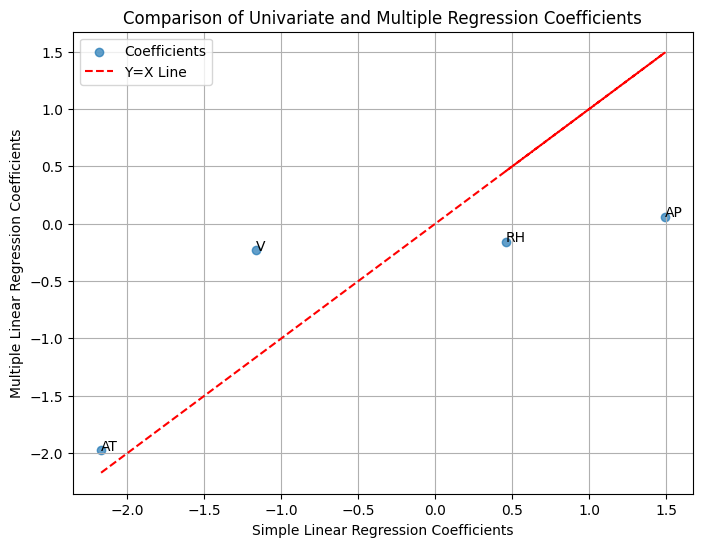

In [68]:
# Coefficients from simple linear regression models
coefficients_simple = [simple_regression_results[predictor].params[1] for predictor in predictors]

# Coefficients from the multiple linear regression model
coefficients_multiple = [multiple_regression_model.params[predictor] for predictor in predictors]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(coefficients_simple, coefficients_multiple, label='Coefficients', alpha=0.7)

# Label the points with the predictor names
for i, predictor in enumerate(predictors):
    plt.annotate(predictor, (coefficients_simple[i], coefficients_multiple[i]), fontsize=10)

# Set labels and title
plt.xlabel('Simple Linear Regression Coefficients')
plt.ylabel('Multiple Linear Regression Coefficients')
plt.title('Comparison of Univariate and Multiple Regression Coefficients')

# Add a reference line (y = x)
plt.plot(coefficients_simple, coefficients_simple, linestyle='--', color='red', label='Y=X Line')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### Description: in simple regression, there are two positive coefficients and two negative. In multiple regression, 1 is positive and three are negative. The Average Temperature coefficient was the only one that stayed consistant in both regressions.

# 1(f)

In [69]:
df2 = df.copy()

df2['AT^2'] = df2['AT']**2
df2['V^2'] = df2['V']**2
df2['AP^2'] = df2['AP']**2
df2['RH^2'] = df2['RH']**2
df2['AT^3'] = df2['AT']**3
df2['V^3'] = df2['V']**3
df2['AP^3'] = df2['AP']**3
df2['RH^3'] = df2['RH']**3

# Define X as all columns except the 'PE' column
X = df2.drop('PE', axis=1)
X = sm.add_constant(X)  # Add intercept term

y = df2['PE']

model = sm.OLS(y, X).fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.316e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:18:32   Log-Likelihood:                -27412.
No. Observations:                9568   AIC:                         5.485e+04
Df Residuals:                    9556   BIC:                         5.493e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0330      0.003    -12.303      0.0

#### Answer: Yes, there is evidence of nonlinear association between any of the predictors and the response, as every coefficient with a quadratic or cubed term is significant at an alpha = 0.05 level

# 1(g)

In [70]:


# Create interaction terms for all pairwise combinations
for col1, col2 in itertools.combinations(['AT', 'V', 'AP', 'RH'], 2):
    df1[f'{col1}*{col2}'] = df1[col1] * df1[col2]



# Define predictors (all columns except 'PE') and response variable
X = df1.drop('PE', axis=1)
X = sm.add_constant(X)  # Add intercept term
y = df1['PE']

# Fit the regression model
interaction_model = sm.OLS(y, X).fit()

# Print summary
print(interaction_model.summary())



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:18:33   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

### Description: yes, there is evidence of interactions of predictors with the response, as some of the interaction terms are statistically significant. The following interaction terms are statstically significant at an alpha = 0.05 level: AT * V, AT * RH, V * AP, V * RH, AP * RH

# 1(h)  

Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? 
- Train the regression model on a randomly selected 70% subset of the data with all predictors.
- Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs

In [71]:
#STEP 1 - Run initial 2 models

#creating a dataframe that has all features necessary
df1['AT^2'] = df1['AT']**2
df1['V^2'] = df1['V']**2
df1['AP^2'] = df1['AP']**2
df1['RH^2'] = df1['RH']**2

base_predictors = ['AT', 'V', 'AP', 'RH']

# Split the data into a 70% subset and a 30% subset
train_data, test_data = train_test_split(df1, test_size=0.3, random_state=42)


# Create the predictor matrix X (including a constant for the intercept)
X1 = train_data[base_predictors]
X1 = sm.add_constant(X1)
y1 = train_data['PE']

# Fit the multiple regression model
regression_model_1 = sm.OLS(y1, X1).fit()


X2 = train_data.drop(columns = ['PE'])
X2 = sm.add_constant(X2)
y2 = train_data['PE']

# Fit the multiple regression model
regression_model_2 = sm.OLS(y2, X2).fit()

#print(regression_model_2.summary())

print(regression_model_2.pvalues)

const    8.518151e-08
AT       4.460633e-02
V        2.671816e-01
AP       9.534685e-09
RH       1.429286e-04
AT*V     3.195237e-03
AT*AP    1.966307e-01
AT*RH    3.056335e-03
V*AP     3.811800e-01
V*RH     8.673824e-01
AP*RH    2.937919e-04
AT^2     5.017196e-07
V^2      6.998020e-01
AP^2     8.522142e-09
RH^2     1.395087e-09
dtype: float64


In [72]:
# STEP 2 - throw out insignificant variables of model 2 (alpha = 0.05) --> AT*AP, V*AP, V*RH, V^2

X2_refined = train_data.drop(columns = ['PE','AT*AP', 'V*AP', 'V*RH', 'V^2'])
X2_refined = sm.add_constant(X2_refined)


# Fit the new and improved multiple regression model
regression_model_2_refined = sm.OLS(y2, X2_refined).fit()

print(regression_model_2_refined.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:18:33   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.046e+04   1091.512     -9.581      0.0

In [73]:
# STEP 3 - Now that all P-values for all predictors are significant, let's test both models 

 
# Predict on training and test data for regression_model_1
y1_train_pred = regression_model_1.predict(X1) 
y1_test_pred = regression_model_1.predict(sm.add_constant(test_data[base_predictors]))

# Compute training and test MSE
mse_train_1 = mean_squared_error(y1, y1_train_pred)  # Assuming y1 is your training target
mse_test_1 = mean_squared_error(test_data['PE'], y1_test_pred)

print("Model 1 Training MSE:", mse_train_1)
print("Model 1 Test MSE:", mse_test_1)


# Predict on training and test data for regression_model_2_refined
y2_train_pred = regression_model_2_refined.predict(X2_refined)  # Assuming X2 is your training predictors for model 2
y2_test_pred = regression_model_2_refined.predict(sm.add_constant(test_data.drop(columns = ['PE','AT*AP', 'V*AP', 'V*RH', 'V^2'])))

# Compute training and test MSE
mse_train_2 = mean_squared_error(y2, y2_train_pred)  # Assuming y2 is your training target for model 2
mse_test_2 = mean_squared_error(test_data['PE'], y2_test_pred)

print("\nModel 2 Training MSE:", mse_train_2)
print("Model 2 Test MSE:", mse_test_2)


Model 1 Training MSE: 20.580839725738695
Model 1 Test MSE: 21.239856938225124

Model 2 Training MSE: 17.917812671185548
Model 2 Test MSE: 18.69434619080569


# 1(i)

Perform k nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k (from 1 to 100)that gives you the
best fit. Plot the train and test errors in terms of 1/k


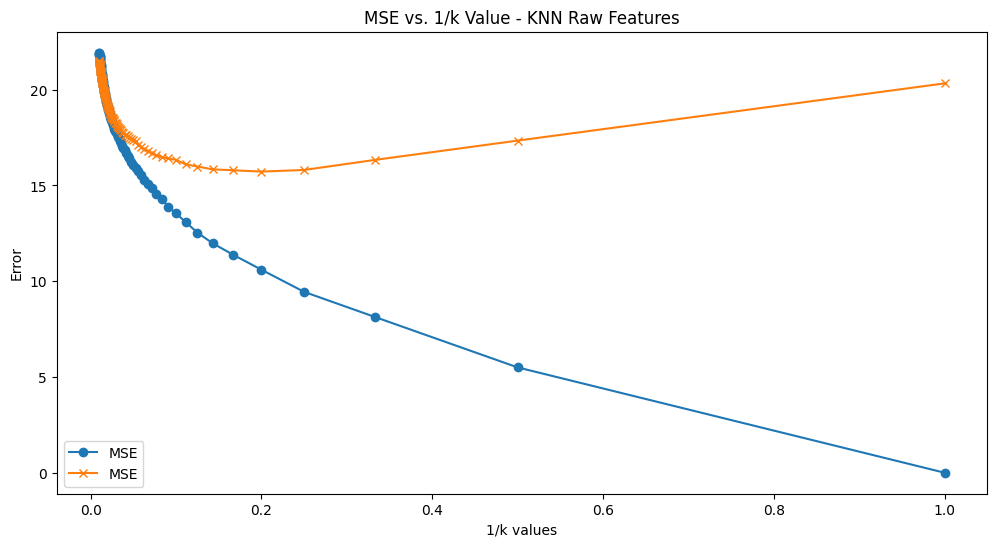

the best k value = 5, yeilding a MSE of 15.726819842563568


In [74]:
#KNN for raw features - measuring MSE

y_test = test_data['PE']
x_test = test_data[['AT','V','AP','RH']]

# Create the predictor matrix X
x_train = train_data[['AT','V','AP','RH']]
y_train = train_data['PE']

# Create a list of k values in descending order
k_values = list(range(1, 101, 1))


train_errors = []
test_errors = []


for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    train_pred = knn.predict(x_train)
    test_pred = knn.predict(x_test)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)


min_test_error = min(test_errors)
min_train_error = min(train_errors)

best_k = k_values[test_errors.index(min_test_error)]


inverse_k_values = [1/k for k in k_values]
# Plot the train and test errors
plt.figure(figsize=(12, 6))
plt.plot(inverse_k_values, train_errors, label='MSE', marker='o')
plt.plot(inverse_k_values, test_errors, label='MSE', marker='x')
plt.xlabel('1/k values')
plt.ylabel('Error')
plt.title('MSE vs. 1/k Value - KNN Raw Features')
plt.legend()
plt.show()

print(f'the best k value = {best_k}, yeilding a MSE of {min_test_error}')


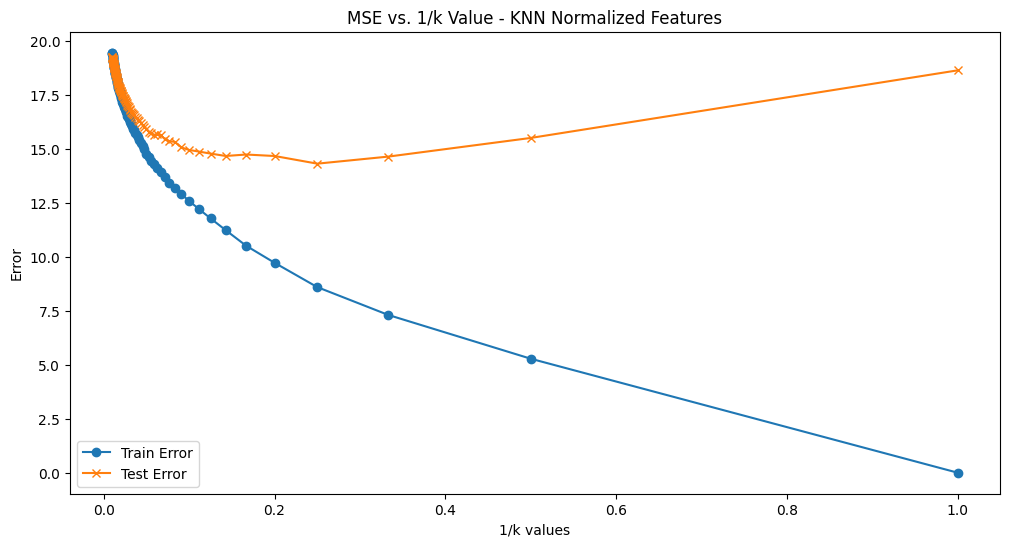

the best k value = 4, yeilding a MSE of 14.305669422675024


In [75]:
#KNN for normalized features - measuring MSE

#scaling the data to a mean of 0 and sd of 1
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

train_errors_normalized = []
test_errors_normalized = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_normalized, y_train)
    
    train_pred = knn.predict(x_train_normalized)
    test_pred = knn.predict(x_test_normalized)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_errors_normalized.append(train_mse)
    test_errors_normalized.append(test_mse)


min_test_error_2 = min(test_errors_normalized)
min_train_error_2 = min(train_errors_normalized)

best_k_2 = k_values[test_errors_normalized.index(min_test_error_2)]


inverse_k_values = [1/k for k in k_values]
# Plot the train and test errors
plt.figure(figsize=(12, 6))
plt.plot(inverse_k_values, train_errors_normalized, label='Train Error', marker='o')
plt.plot(inverse_k_values, test_errors_normalized, label='Test Error', marker='x')
plt.xlabel('1/k values')
plt.ylabel('Error')
plt.title('MSE vs. 1/k Value - KNN Normalized Features')
plt.legend()
plt.show()

print(f'the best k value = {best_k_2}, yeilding a MSE of {min_test_error_2}')




# 1(j)

Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis.

### Answer: The best linear regression model was Model 2, which yielded a test MSE: 18.69434619080569. This model contained some quadratic terms and some interaction terms. The best KNN regression model was normalized model, which yeileded a test MSE: 14.305669422675024 when using k = 4. In conclusion, the KNN regression model that uses normalized features is the most accurate model.



# 2 - ISLR: 2.4.1

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

- (a) The sample size n is extremely large, and the number of predic- tors p is small.
- (b) The number of predictors p is extremely large, and the number of observations n is small.
- (c) The relationship between the predictors and response is highly non-linear.
- (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.


# Answeres to the above

 - A: I would expect the flexible method to perform better because the flexible method can learn nuances/patterns in the data with a smaller risk of overfitting due to the  large sample size and few amount of features
 - B: I would expect the performance of the inflexible method to perform better because the noise will be greater due to less observations, and a higher risk the flexible method will over fit to this noise. A simple, inflexible model will be less likely to overfit this limited data. 
 - C: I would expect the flexible method to perform better because it is better designed to pick up on complex, nonlinear relationships. Inflexible methods tend to do better with more simple relationships. 
 - D: I would expect the performance of the inflexible method to perform better because high variance means a lot of noise. Flexible models will overfit to the noise; there is a smaller risk of overfitting with inflexible models.

# 3 - ISLR: 2.4.7

Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.
- (a) Compute the Euclidean distance between each observation and thetestpoint,X1 =X2 =X3 =0.
- (b) What is our prediction with K = 1? Why?
- (c) What is our prediction with K = 3? Why?
- (d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?

### Answer to Part A

In [76]:
#PART A

# Define the data set
data = [
    ["Obs.", "X1", "X2", "X3", "Y"],
    [1, 0, 3, 0, "Red"],
    [2, 2, 0, 0, "Red"],
    [3, 0, 1, 3, "Red"],
    [4, 0, 1, 2, "Green"],
    [5, -1, 0, 1, "Green"],
    [6, 1, 1, 1, "Red"]
]

# Define the test point
test_point = [0, 0, 0]

# Calculate Euclidean distances
distances = []
for row in data[1:]:  # Skip the header row
    observation = row[1:4]  # Extract X1, X2, X3 from the row

    #x represents observation, y represents test point
    distance = math.sqrt(sum((x - y) ** 2 for x, y in zip(observation, test_point)))
    distances.append(distance)

# Print the distances
for i, distance in enumerate(distances, start=1):
    print(f"Euclidean distance from observation {i}: {distance:.2f}")


Euclidean distance from observation 1: 3.00
Euclidean distance from observation 2: 2.00
Euclidean distance from observation 3: 3.16
Euclidean distance from observation 4: 2.24
Euclidean distance from observation 5: 1.41
Euclidean distance from observation 6: 1.73


### Answer to part B, C, D

- B: The prediction for k = 1 is "Green." Explanation: setting k = 1 means we are looking the single closest point and using that as the prediction. The closest point is observation 5 because it has the smallest Euclidean distance (1.41) which has the color green, so the prediction for [0,0,0] will be green.
- C: The prediction for k = 3 is "Green". Explanation: the three smnallest distances are observation 5 "Green", 6 "Green", and 2 "Red." By majority vote, green wins.
- D: The best value for K in KNN is likely to be small because the algorithm can better capture the localized, fine grained patterns in the data and thus can better capture the the non-linear boundary. A larger K might oversimplify the boundary and be less accurate.  

